# MAP572 - TD1

In [5]:
import numpy as np
import scipy.sparse as sparse
import sys
import time
import matplotlib.pyplot as plt

In [33]:
def triangulaireSup(L,b):
    n = len(b)
    x = np.zeros(n)
    for i in range(1,n+1):
        if L[n-i][n-i] == 0:
            return "Erreur, 0 sur la diagonale à la ligne {}".format(n-i)
    
        else:
            x[n-i] = (b[n-i] - np.dot(L[n-i][n-i+1:], x[n-i+1:]))/L[n-i][n-i]
    return x


In [80]:
S = np.array([[1,2,3],[0,1,2],[0,0,1]])
b = np.array([3,2,1])

In [81]:
triangulaireSup(S,b)

array([0., 0., 1.])

In [98]:
def triangulaireInf(L,b):
    n = len(b)
    x = np.zeros(n)
    for i in range(0,n):
        if L[i][i] == 0:
            return "Erreur, 0 sur la diagonale à la ligne {}".format(i)
    
        else:
            x[i] = (b[i] - np.dot(L[i][:i], x[:i]))/L[i][i]
    return x

In [99]:
I = np.array([[0.5,0,0],[1,2,0],[1,2,3]])

In [104]:
S.shape[0]

3

In [204]:
def factLU(A):
    n=np.shape(A)[0]
    L = np.identity(n)
    U = np.zeros(shape=(n,n))
    for i in range(0, n-1):
        for j in range(i+1, n):
            L[j,i] = A[j,i]/A[i,i]
            for k in range(i + 1, n):
                A[j:k] -= L[j, i] * U[i, k]
        for j in range(i, n):
            U[i,j] = A[i,j]
    U[-1,-1] = A[-1,-1]
    return L, U

In [205]:
factLU(np.ones((3,3)))
# factLU(S)

(array([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]]), array([[1., 1., 1.],
        [0., 1., 1.],
        [0., 0., 1.]]))

# Matrices creuses

In [202]:
def matriceCreuse(N, d):
    matrix = sparse.rand(N,N, density = d)
    return matrix
   

In [195]:
def espaceDeStockage(N):
    A = np.array((N,N))
    taillePleine = sys.getsizeof(A)
    
    B = sparse.rand(N,N, density = 0.01)
    tailleCreuse = sys.getsizeof(B)
    
    return( "tailleCreuse = {}, taillePleine = {}".format(tailleCreuse, taillePleine))



In [316]:
A = np.random.rand(2000,2000)
B = np.random.rand(2000,2000)
vecteur = np.random.rand(2000)
matrix = sparse.rand(2000, 2000, 0.001)

In [317]:
def tempsMatriceMatrice():
    t0 = time.time()
    np.dot(A,B)
#     A*B
    t1 = time.time()
    return t1-t0

def tempsMatriceVecteur():
    t0 = time.time()
    np.dot(A, vecteur)
#     A* vecteur
    t1 = time.time()
    return t1-t0

def tempsCreuseVecteur():
    t0 = time.time()
    np.dot(matrix, vecteur)
#     matrix * vecteur
    t1 = time.time()
    return t1-t0

In [318]:
def comparaisonDesTemps():
    print("Matrice * Matrice = {} s".format(tempsMatriceMatrice()))
    print("Matrice * Vecteur = {} s".format(tempsMatriceVecteur()))
    print("Creuse * Vecteur = {} s".format(tempsCreuseVecteur()))

In [319]:
comparaisonDesTemps()

Matrice * Matrice = 0.1405928134918213 s
Matrice * Vecteur = 0.00099945068359375 s
Creuse * Vecteur = 0.19248390197753906 s


# Methodes de type gradient

In [2]:
def GPF(A,b, tol, alpha, itermax, x0):
    r = b - np.dot(A,x0)
    x = x0 + alpha*r
    iterations = 0
    while (np.linalg.norm(r) > tol):
        if (iterations > itermax):
            print("Max iterations overflow")
            return x, iterations
        
        r = b-np.dot(A,x)
        x = x + alpha * r
        iterations +=1
    
    return x, iterations


GPF(np.ones((3,3)), [1000,1000,1000], 0.001, 0.001, 5000, np.ones(3))

(array([333.33314199, 333.33314199, 333.33314199]), 4781)

In [25]:
def nombreIterations():
    X=[]
    Y=[]
    for alpha in np.arange(0.0001, 0.1, 0.001):
        X.append(alpha)
        Y.append(GPF(np.ones((3,3)), [5,4,1], 0.001, alpha, 100000, np.ones(3))[1])
        
    plt.plot(X,Y)
    plt.xscale("log")
    plt.xlabel("alpha - logscale")
    plt.ylabel("iterations")

Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations overflow
Max iterations o

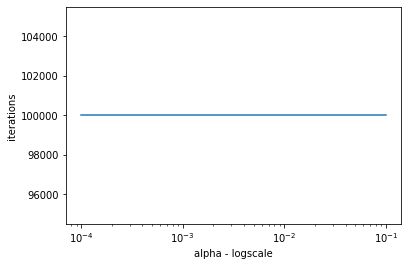

In [26]:
nombreIterations()

In [17]:
def GPO(A, b, tol, itermax, x0):
    r = b - np.dot(A,x0)
    alpha = np.dot(r,r)/np.dot(np.dot(A,r), r)
    x = x0 + alpha*r
    iterations = 0
    while (np.linalg.norm(r) > tol):
        if (iterations > itermax):
            print("Max iterations overflow")
            return x, iterations
        
        r = b-np.dot(A,x)
        alpha = np.dot(r,r)/np.dot(np.dot(A,r), r)
        x = x + alpha * r
        iterations +=1
    
    return x, iterations

In [18]:
GPO(np.ones((3,3)), [2,2,2], 0.001, 5000, np.ones(3))

C:\Users\Olivier Desclaux\Anaconda3\envs\map572\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


(array([nan, nan, nan]), 1)